In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fooddata/lunch.csv
/kaggle/input/fooddata/dinner.csv
/kaggle/input/fooddata/breakfast.csv
/kaggle/input/filtered-dataset/muscle_dinner_df.csv
/kaggle/input/filtered-dataset/heart_dinner_df.csv
/kaggle/input/filtered-dataset/muscle_lunch_df.csv
/kaggle/input/filtered-dataset/heart_breakfast_df.csv
/kaggle/input/filtered-dataset/heart_lunch_df.csv
/kaggle/input/filtered-dataset/muscle_breakfast.csv


In [3]:
class MultiArmBandit:
    def __init__(self, initial_epsilon, num_clusters, decay_rate):
        self.initial_epsilon = initial_epsilon
        self.epsilon = initial_epsilon
        self.num_clusters = num_clusters
        self.counts = [0] * num_clusters
        self.values = [2.0] * num_clusters
        self.decay_rate = decay_rate

    def choose_arm(self):
        if np.random.random() > self.epsilon:
            return np.argmax(self.values)
        else:
            return np.random.choice(self.num_clusters)

    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[arm] = new_value

    def decay_epsilon(self):
        if(self.epsilon>0.2):
            self.epsilon *= self.decay_rate


In [4]:
# Function to simulate rating (rewarding) the cluster of a recipe
def rate_cluster(recipe_id):
    # Here you can implement your own logic to rate the cluster
    # For simplicity, let's assume the rating is a random number between 0 and 5
    return np.random.uniform(0, 5)

In [5]:
def GreedyEpsilon(df, epsilon, decay_rate):
#     epsilon = 1.0  # Initial epsilon value
#     decay_rate = 0.99  # Decay rate, you can adjust this
    num_clusters=df['Cluster'].nunique()
    bandit = MultiArmBandit(epsilon, num_clusters, decay_rate=decay_rate)
    recommended_recipes=[]
    
    
    # Update bandit and decay epsilon
    for i in range(365):
        cluster = bandit.choose_arm()
        cluster_df = df[df['Cluster'] == cluster]
        random_row_index = np.random.randint(0, len(cluster_df))
        recipe_id = cluster_df.iloc[random_row_index]['RecipeID']
        recipe_name = cluster_df.iloc[random_row_index]['Name']
        
        recommended_recipes.append([recipe_id,recipe_name,cluster])
        reward = rate_cluster(recipe_id)
        bandit.update(cluster, reward)
        bandit.decay_epsilon()  # Decay epsilon after each iteration
    return recommended_recipes

In [6]:
heart_breakfast=pd.read_csv('/kaggle/input/filtered-dataset/heart_breakfast_df.csv')
heart_lunch=pd.read_csv('/kaggle/input/filtered-dataset/heart_lunch_df.csv')
heart_dinner=pd.read_csv('/kaggle/input/filtered-dataset/heart_dinner_df.csv')
muscle_breakfast=pd.read_csv('/kaggle/input/filtered-dataset/muscle_breakfast.csv')
muscle_lunch=pd.read_csv('/kaggle/input/filtered-dataset/muscle_lunch_df.csv')
muscle_dinner=pd.read_csv('/kaggle/input/filtered-dataset/muscle_dinner_df.csv')

In [7]:
def resetRecipeIDs(df):
    for i in range(len(df)):
    # Update the RecipeID values to continuous values starting from 0
        df.at[i, 'RecipeID'] = i
resetRecipeIDs(heart_breakfast)
heart_breakfast

,RecipeID,Name,Ingredients,Servings Per Recipe,Calories,Protein,Total Carbohydrate,Total Fat,Saturated Fat,Cholesterol,Dietary Fiber,Sodium,Rating,Number of Ratings,URL,Scaling_Factor,Cluster
0,0,Brennan's Irish Soda Bread,1 cup milk 2 tablespoons distilled white vineg...,8,135,29.629630,200.000000,7.407407,0.000000,14.814815,7.407407,1755.555556,4.8,334,https://www.allrecipes.com/recipe/213830/brenn...,7.407407,0
1,1,Irish Barmbrack,2 ½ cups chopped dried mixed fruit 1 ½ cups ho...,12,294,13.605442,238.095238,3.401361,0.000000,54.421769,3.401361,234.693878,4.6,31,https://www.allrecipes.com/recipe/162072/irish...,3.401361,1
2,2,Irish Soda Bread in a Skillet,1 cup milk 1 teaspoon vinegar 2 cups all-purpo...,8,129,31.007752,193.798450,7.751938,0.000000,15.503876,7.751938,1837.209302,4.6,227,https://www.allrecipes.com/recipe/51447/irish-...,7.751938,0
3,3,The World's Best Irish Soda Bread,"1 tablespoon cornmeal, or as needed 1 ½ cups u...",12,208,28.846154,177.884615,24.038462,14.423077,52.884615,14.423077,1706.730769,4.0,6,https://www.allrecipes.com/recipe/236816/the-w...,4.807692,0
4,4,Bread Machine Irish Soda Bread,1 ½ cups warm water (110 degrees F/45 degrees ...,15,185,32.432432,194.594595,10.810811,0.000000,0.000000,5.405405,967.567568,3.8,20,https://www.allrecipes.com/recipe/7083/irish-s...,5.405405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,Pumpkin Spice Protein Drink,"1 cup unsweetened almond milk 2 bananas, slic...",2,280,78.571429,164.285714,10.714286,3.571429,21.428571,28.571429,685.714286,4.8,24,https://www.allrecipes.com/recipe/237690/pumpk...,3.571429,2
184,184,Healthier Good Old Fashioned Pancakes,1 ½ cups all-purpose flour 3 ½ teaspoons bakin...,8,135,37.037037,162.962963,22.222222,14.814815,59.259259,7.407407,4111.111111,4.0,49,https://www.allrecipes.com/recipe/222132/healt...,7.407407,0
185,185,Fig Smoothie,"2 frozen bananas, peeled and chopped 6 fresh...",2,335,17.910448,232.835821,8.955224,2.985075,20.895522,26.865672,125.373134,4.4,37,https://www.allrecipes.com/recipe/190893/fig-s...,2.985075,1
186,186,Summer Fruit Salad with Mint Dressing,4 cups cubed seeded watermelon 2 cups sliced f...,8,99,20.202020,252.525253,10.101010,0.000000,0.000000,30.303030,30.303030,4.9,26,https://www.allrecipes.com/recipe/228231/summe...,10.101010,1


In [8]:
# heart_bf_ids=heaaggrt_breakfast['RecipeID']

In [9]:
# heart_bf_ids

In [10]:
rec_heart_bf=GreedyEpsilon(heart_breakfast,1.0,0.99)
rec_heart_lunch=GreedyEpsilon(heart_lunch,1.0,0.99)
rec_heart_dinner=GreedyEpsilon(heart_dinner,1.0,0.99)

In [11]:
# rec_heart_bf
def extractChosenIds(rec):
    ids=[]
    for l in rec:
        ids.append(l[0])
    return ids

def extractChosenClusters(rec):
    ids=[]
    for l in rec:
        ids.append(l[2])
    return ids

# len(recipe_ids)

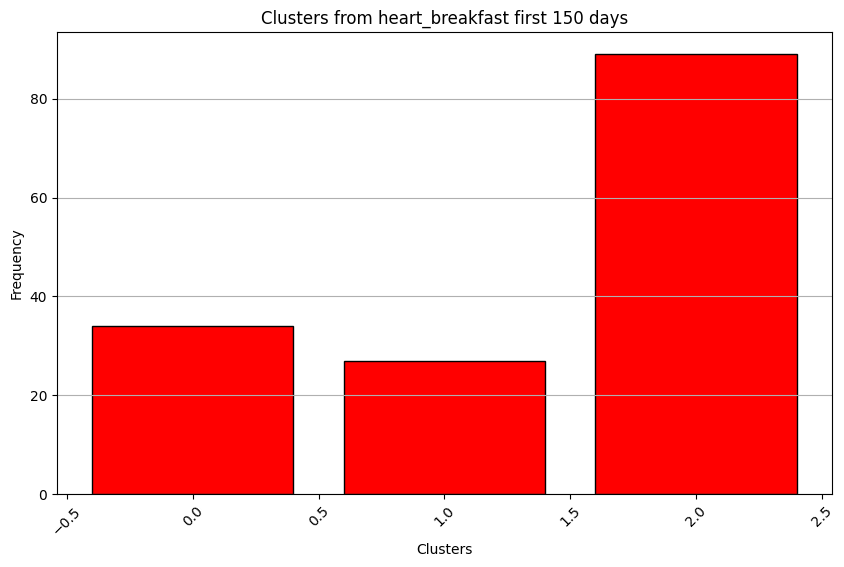

In [14]:
recipe_cls=extractChosenClusters(rec_heart_bf[0:150])
clst_counts = {clst: recipe_cls.count(clst) for clst in set(recipe_cls)}
all_recipe_cls = heart_breakfast['Cluster'].unique()
recipe_id_freq = {recipe_id: clst_counts.get(recipe_id, 0) for recipe_id in all_recipe_cls}
# Plot the histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(recipe_id_freq.keys(), recipe_id_freq.values(), color='red', edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Frequency')
plt.title('Clusters from heart_breakfast first 150 days')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Show gridlines only along the y-axis
plt.show()
# import plotly.express as px

# Convert recipe_id_freq dictionary to a DataFrame
# df_cluster_id_freq = pd.DataFrame(list(recipe_id_freq.items()), columns=['Cluster', 'Frequency'])

# # Plot the bar chart using Plotly Express
# fig = px.bar(df_cluster_id_freq, x='Cluster', y='Frequency', 
#              labels={'Cluster': 'Cluster', 'Frequency': 'Frequency'},
#              title='Bar Chart of Cluster Frequencies')
# fig.show()


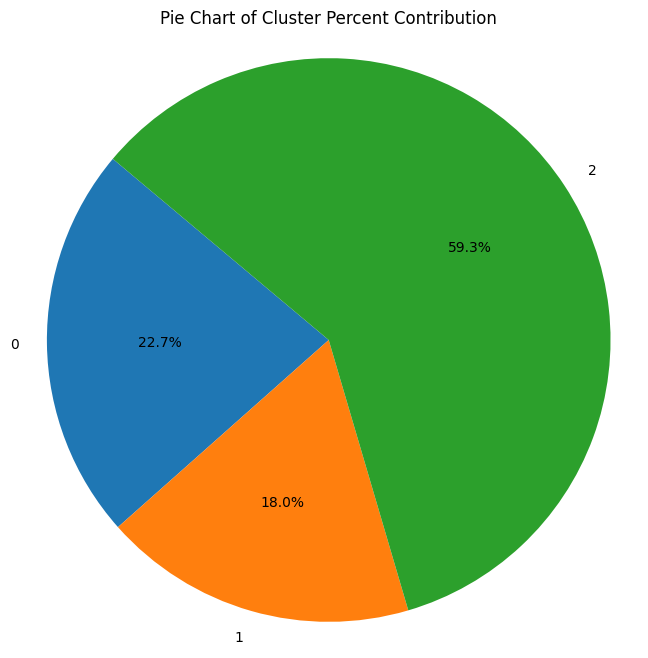

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(recipe_id_freq.values(), labels=recipe_id_freq.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Cluster Percent Contribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [169]:
# recipe_cls

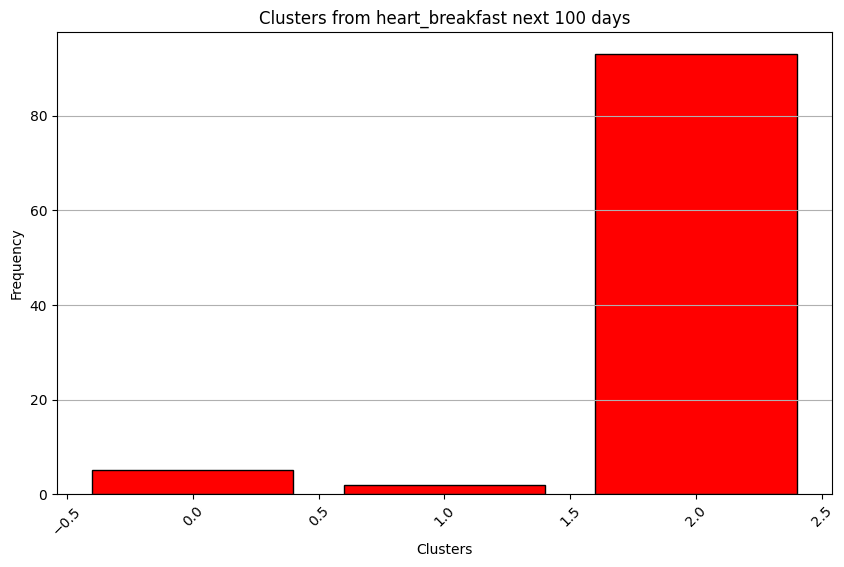

In [26]:
recipe_cls=extractChosenClusters(rec_heart_bf[150:250])
clst_counts = {clst: recipe_cls.count(clst) for clst in set(recipe_cls)}
all_recipe_cls = heart_breakfast['Cluster'].unique()
recipe_id_freq = {recipe_id: clst_counts.get(recipe_id, 0) for recipe_id in all_recipe_cls}
# Plot the histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(recipe_id_freq.keys(), recipe_id_freq.values(), color='red', edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Frequency')
plt.title('Clusters from heart_breakfast next 100 days')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Show gridlines only along the y-axis
plt.show()

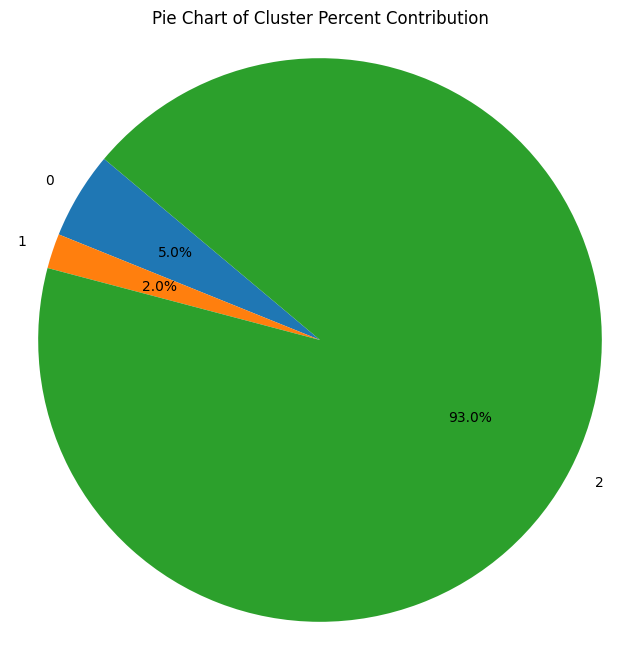

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(recipe_id_freq.values(), labels=recipe_id_freq.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Cluster Percent Contribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

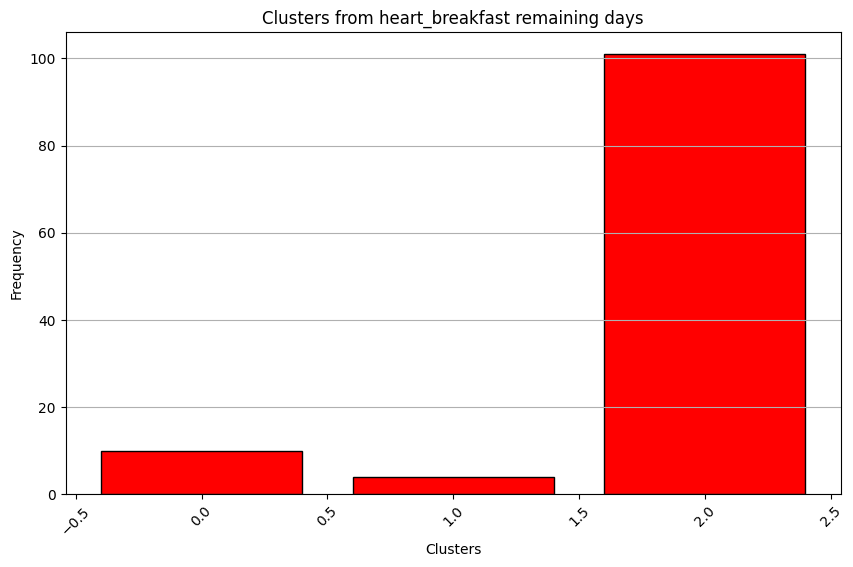

In [28]:
recipe_cls=extractChosenClusters(rec_heart_bf[250:365])
clst_counts = {clst: recipe_cls.count(clst) for clst in set(recipe_cls)}
all_recipe_cls = heart_breakfast['Cluster'].unique()
recipe_id_freq = {recipe_id: clst_counts.get(recipe_id, 0) for recipe_id in all_recipe_cls}
# Plot the histogram
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.hist(recipe_id_freq.keys(), weights=recipe_id_freq.values(), bins=len(all_recipe_ids), color='skyblue', edgecolor='black')
# plt.xlabel('RecipeID')
# plt.ylabel('Frequency')
# plt.title('Histogram of RecipeIDs from heart_breakfast DataFrame')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()
plt.figure(figsize=(10, 6))
plt.bar(recipe_id_freq.keys(), recipe_id_freq.values(), color='red', edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Frequency')
plt.title('Clusters from heart_breakfast remaining days')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Show gridlines only along the y-axis
plt.show()

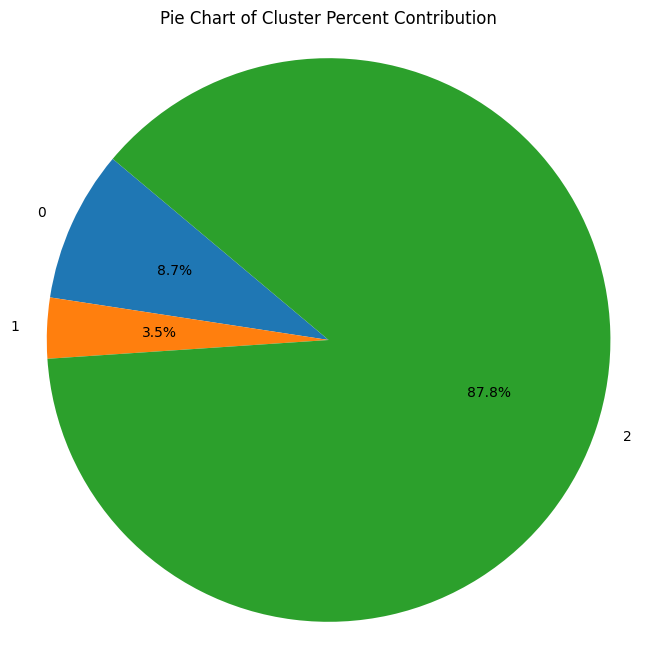

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(recipe_id_freq.values(), labels=recipe_id_freq.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Cluster Percent Contribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [163]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))

# # Histogram for the first 150 recipe names
# plt.subplot(1, 3, 1)
# plt.hist(rec_heart_bf[0:150], bins=30, color='skyblue', edgecolor='black')
# plt.title('First 150 Recipes')
# plt.xlabel('Recipe Names')
# plt.ylabel('Frequency')

# # Histogram for the next 100 recipe names
# plt.subplot(1, 3, 2)
# plt.hist(rec_heart_bf[150:250], bins=30, color='salmon', edgecolor='black')
# plt.title('Next 100 Recipes')
# plt.xlabel('Recipe Names')
# plt.ylabel('Frequency')

# # Histogram for the remaining 115 recipe names
# plt.subplot(1, 3, 3)
# plt.hist(rec_heart_bf[250:], bins=30, color='lightgreen', edgecolor='black')
# plt.title('Remaining 115 Recipes')
# plt.xlabel('Recipe Names')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [164]:
pip install streamlit

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import streamlit as st

In [ ]:

st.set_page_config(
    page_title="Hello",
    page_icon="👋",
)

st.write("# Welcome to Diet Recommendation System! 👋")

st.sidebar.success("Select a recommendation app.")

st.markdown(
    """
    A diet recommendation web application using content-based approach with Scikit-Learn, FastAPI and Streamlit.
    You can find more details and the whole project on my [repo](https://github.com/zakaria-narjis/Diet-Recommendation-System).
    """
)
